# **Medical Insurance Cost Regression Analysis**

Este proyecto utiliza el conjunto de datos de seguros proporcionado por [Miri Choi](https://www.kaggle.com/datasets/mirichoi0218/insurance/data) en Kaggle, y el objetivo es predecir los gastos del seguro (costos médicos). El dataset contiene la siguiente información:

* **age:** Edad del beneficiario principal

* **sex:** Género del contratante del seguro (femenino, masculino)

* **bmi:** Índice de Masa Corporal, proporciona una comprensión del peso corporal relativamente alto o bajo en relación con la altura. Es un índice objetivo del peso corporal ($kg / m^2$) usando la proporción entre la altura y el peso. Idealmente entre 18.5 y 24.9

* **children:** Número de hijos cubiertos por el seguro / Número de dependientes

* **smoker:** Si la persona fuma o no

* **region:** Área residencial del beneficiario en EE. UU. (noreste, sureste, suroeste, noroeste)

* **charges:** Costos médicos individuales facturados por el seguro

## **Importar las librerías**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## **Cargar y explorar los datos**

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Número de filas y columnas del dataframe
df.shape

(1338, 7)

In [4]:
#Revisar valores faltantes
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#Analizar el rango de cada variable para entender su distribución
for col in df.columns:
    print(f'Rango de {col}: {df[col].min(),df[col].max()}')

Rango de age: (18, 64)
Rango de sex: ('female', 'male')
Rango de bmi: (15.96, 53.13)
Rango de children: (0, 5)
Rango de smoker: ('no', 'yes')
Rango de region: ('northeast', 'southwest')
Rango de charges: (1121.8739, 63770.42801)


In [6]:
#Tipo de variable en cada columna
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#Convertir variables categóricas a numéricas
df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
df.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

C:\Users\yamil\AppData\Local\Temp\ipykernel_12108\3409677971.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\yamil\AppData\Local\Temp\ipykernel_12108\3409677971.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
C:\Users\yamil\AppData\Local\Temp\ipykernel_12108\3409677971.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beh

In [8]:
#Verificar nuevamente los tipos de variables
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [9]:
#Valores únicos de las variables
print('Número de valores únicos de:')
for column in df.columns:
    print(f'  {column}: {df[column].nunique()}')

Número de valores únicos de:
  age: 47
  sex: 2
  bmi: 548
  children: 6
  smoker: 2
  region: 4
  charges: 1337


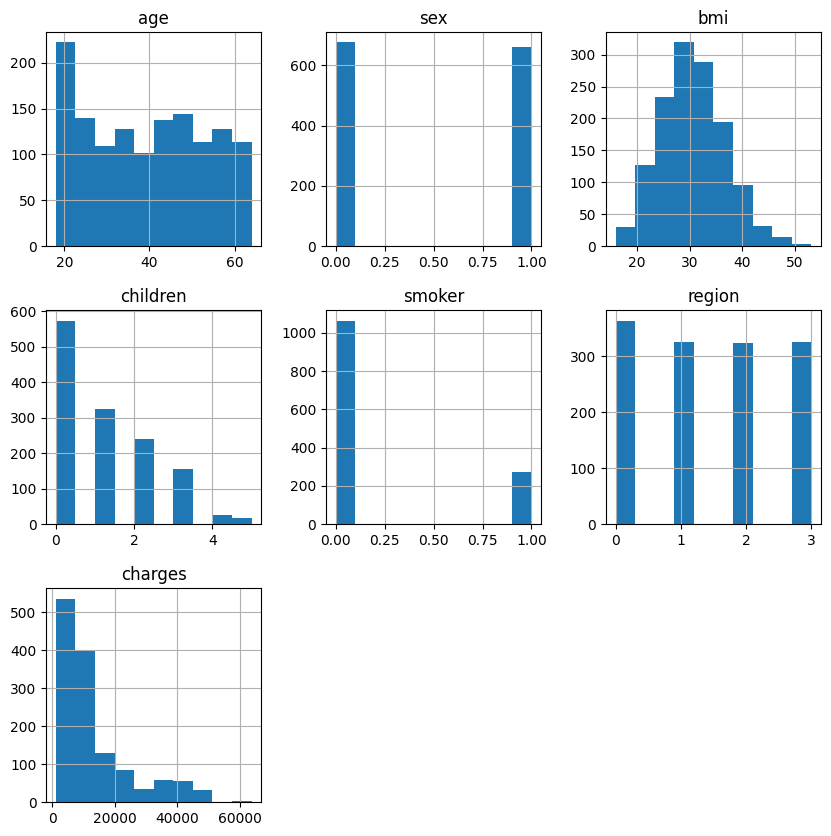

In [10]:
#Histogramas de todas las variables
df.hist(figsize=(10,10))
plt.show()

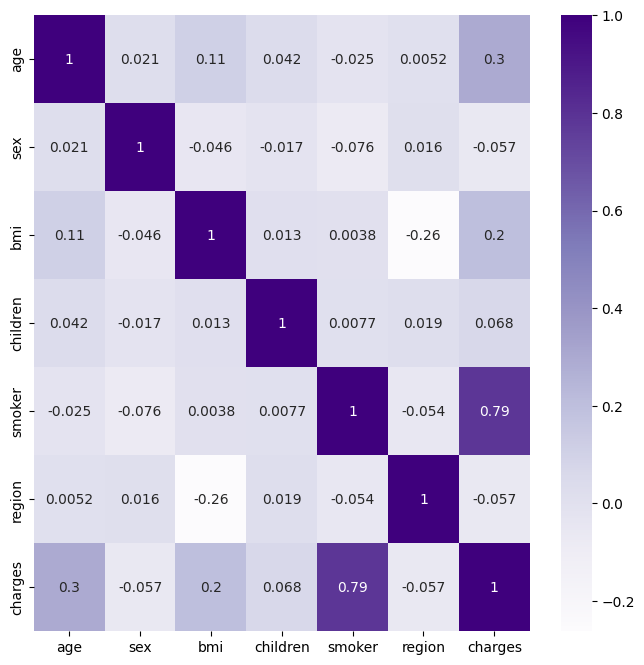

In [11]:
#Correlación entre variables
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(df.corr(), annot=True, cmap='Purples')

Podemos notar que la correlación entre las varibles *smoker* y *charges* es muy alta. Esto nos indica que el hecho de que una persona fume o no, afecta significativamente los costos médicos.

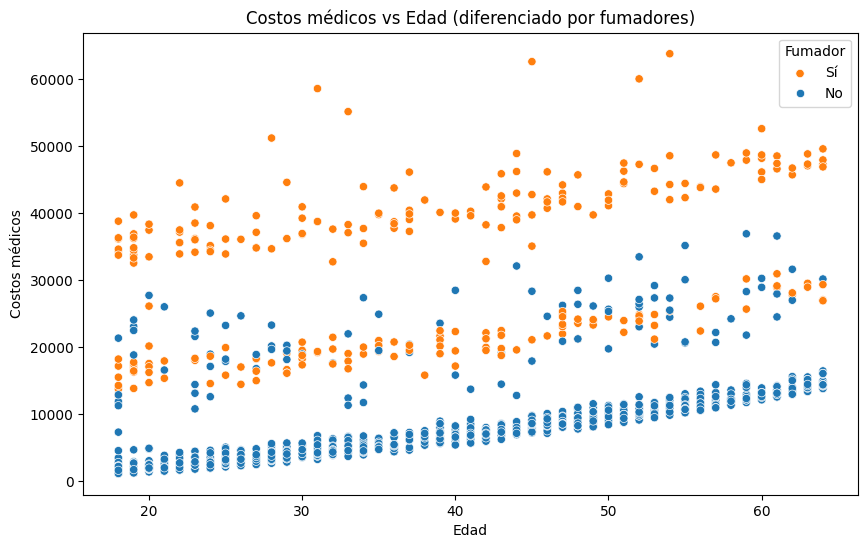

In [12]:
#Gráfico de dispersión para visualizar la relación entre la edad y los costos médicos, coloreando los puntos según si son fumadores o no
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['age'], y=df['charges'], hue='smoker', data=df)
plt.title('Costos médicos vs Edad (diferenciado por fumadores)')
plt.xlabel('Edad')
plt.ylabel('Costos médicos')
plt.legend(title='Fumador', labels=['Sí', 'No'])
plt.show()

Podemos ver que los fumadores tienen costos médicos más altos en todas las edades, en comparación a los que no fuman. Además, conforme aumenta la edad, también aumentan los costos médicos.

Sin embargo, la variabilidad dentro del grupo de fumadores sigue siendo alta (puntos dispersos en valores altos), lo que sugiere que otros factores interactúan con el tabaquismo.

Sabemos que un BMI > 30 es sobrepeso/obesidad, por lo que fumadores con obesidad podrían tener costos más altos que los que tienen un BMI normal. En la siguiente gráfica se visualiza esta interacción (fumador y BMI).

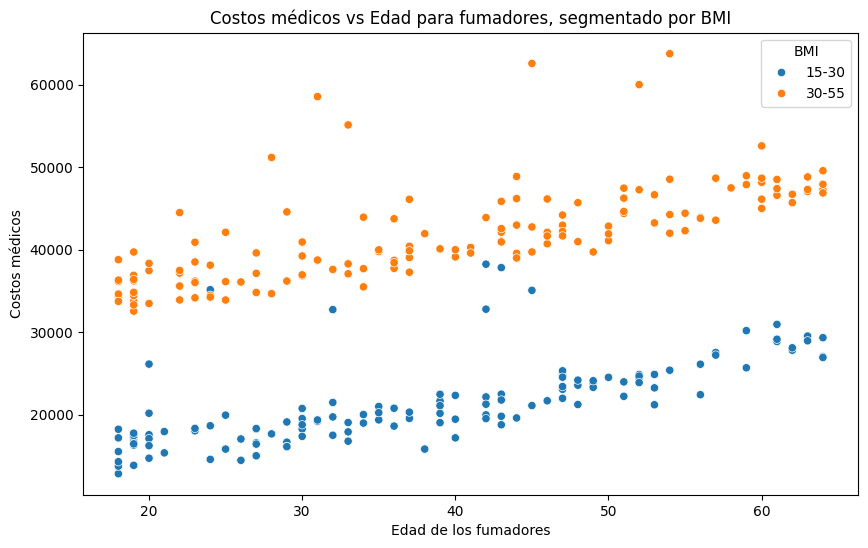

In [13]:
#Graficar la relación entre los costos médicos y la edad, pero sólo de los fumadores, categorizando el BMI en dos grupos
plt.figure(figsize=(10,6))

'''Crear 2 categorías para BMI usando un punto de corte de 30:
    - '15-30': BMI normal o bajo
    - '30-55': BMI alto (sobrepeso/obesidad)'''
cutoff_point = 30 
df_copy = df.copy()
df_copy['bmi'] = pd.cut(df_copy['bmi'], bins=[-np.inf, cutoff_point, np.inf], labels=['15-30', '30-55'])

sns.scatterplot(x=df_copy[df_copy['smoker']==1]['age'], 
                y=df_copy['charges'], 
                hue='bmi', 
                data=df_copy)
plt.title('Costos médicos vs Edad para fumadores, segmentado por BMI')
plt.xlabel('Edad de los fumadores')
plt.ylabel('Costos médicos')
plt.legend(title='BMI')
plt.show()

Los fumadores con BMI > 30 muestran costos médicos más altos en todas las edades en comparación con fumadores de BMI normal. Por lo tanto, la gráfica confirma que el BMI es un moderador crítico en la relación entre tabaquismo y costos médicos.

## **Regresión Lineal**

In [14]:
X = df.drop(['charges'], axis = 1) #Variables predictoras (todas excepto charges)
y = df['charges'] #Variable objetivo

In [15]:
#Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Train: {X_train.shape, y_train.shape}')
print(f'Test: {X_test.shape, y_test.shape}')

Train: ((1070, 6), (1070,))
Test: ((268, 6), (268,))


In [16]:
lr = LinearRegression() #Crear una instancia del modelo de regresión lineal
lr.fit(X_train, y_train) #Entrenar el modelo con los datos de entrenamiento

LinearRegression()

In [17]:
#Intercept: Costo médico predicho cuando todas las variables predictoras son 0
print('Intercepto:', lr.intercept_)

Intercepto: -12580.898279441999


El intercepto indica que si un paciente tuviera age=0, sex=0 (masculino), bmi=0, children=0, smoker=0 (no fumador) y region=0 (sudeste), el modelo predeciría un costo médico de -12,580.90 USD. 

Esto no tiene sentido práctico, ya que los costos médicos no pueden ser negativos, y variables como edad o BMI no pueden ser 0 en un contexto real. Por lo tanto, su valor negativo no implica un problema en el modelo.

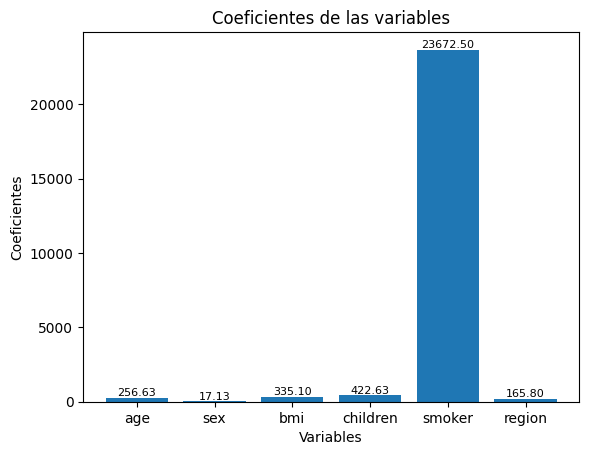

In [18]:
#Coefficients: Representan el impacto individual de cada variable predictora en el costo médico
bars = plt.bar(X_train.columns, lr.coef_)

#Añadir valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

plt.title('Coeficientes de las variables')
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.show()

* **age:** Por cada año adicional de edad, el costo médico aumenta 256.63 USD.
* **sex:** Si sex=1 (femenino), el costo aumenta 17.13 USD en comparación con sex=0 (masculino).
* **bmi:** Por cada unidad adicional de BMI, el costo aumenta 335.10 USD.
* **children:** Por cada hijo adicional cubierto por el seguro, el costo aumenta 422.63 USD.
* **smoker:** Ser fumador (smoker=1) aumenta el costo en 23,672.50 USD en comparación a los no fumadores.
* **region:** Dependiendo de la región, el costo varía en 165.80 USD.

Con esto volvemos a notar que el hecho de fumar aumenta significativamente el valor de los costos médicos.

In [19]:
#Predicciones en train y test
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [20]:
#Función para obtener las métricas de evaluación
def evaluate_model(y, y_pred, dataset):
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f'\nMSE en {dataset}: {mse}')
    print(f'R² Score en {dataset}: {r2}')

    return r2

In [21]:
r2_train_lr = evaluate_model(y_train, y_pred_train, 'train')
r2_test_lr = evaluate_model(y_test, y_pred_test, 'test')


MSE en train: 37337214.4107756
R² Score en train: 0.7413131194887537

MSE en test: 33685623.354144424
R² Score en test: 0.783021587162344


In [22]:
#Función para graficar los costos reales vs. los predichos
def plot_actual_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    y = np.arange(0, y_test.max())
    plt.plot(y, y, linestyle='--', color='red')
    plt.xlabel('Costos reales')
    plt.ylabel('Costos predichos')
    plt.title('Costos reales vs. Costos predichos')
    plt.grid(True)
    plt.show()

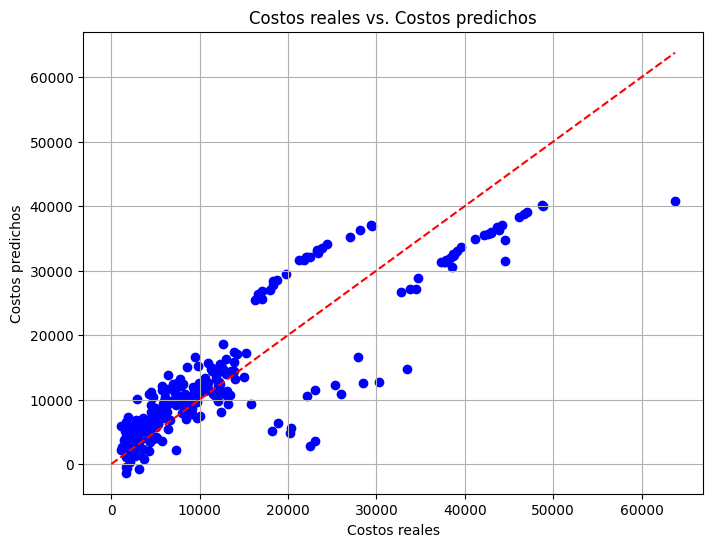

In [23]:
plot_actual_predicted(y_test, y_pred_test)

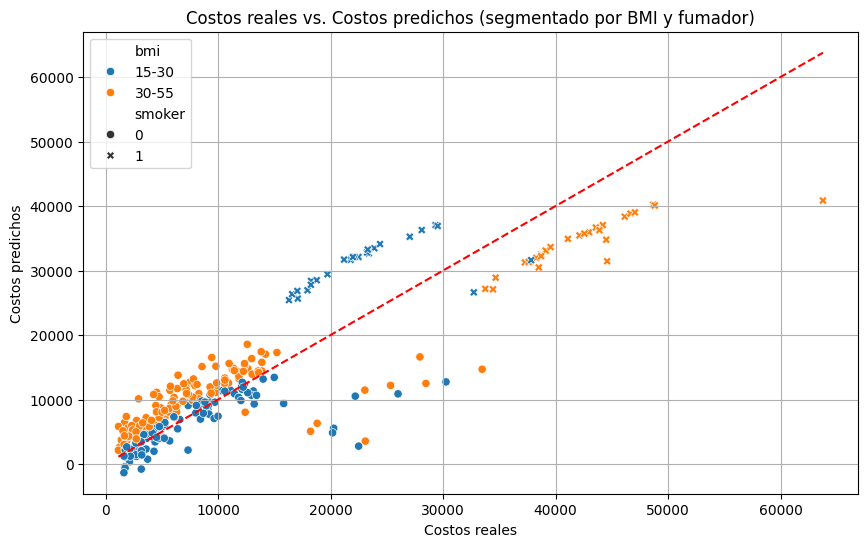

In [24]:
#Crear un dataframe que combine y_test, y_pred_test, smoker y bmi
data = pd.DataFrame({
    'y_test': y_test, #Costos médicos reales (datos de prueba)
    'y_pred': y_pred_test, #Costos predichos por el modelo
    'smoker': X_test['smoker'], #Si el paciente es fumador (1) o no (0)
    'bmi': X_test['bmi'] #Índice de masa corporal
})

'''Clasificar el BMI en dos categorías para una mejor visualización:
    - '15-30': BMI normal o bajo
    - '30-55': BMI alto (sobrepeso/obesidad)'''
data['bmi'] = pd.cut(data['bmi'], bins = [-np.inf, 30, np.inf], labels = ['15-30', '30-55'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='y_test', y='y_pred', hue='bmi', style='smoker', data=data)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('Costos reales vs. Costos predichos (segmentado por BMI y fumador)')
plt.xlabel('Costos reales')
plt.ylabel('Costos predichos')
plt.grid(True)
plt.show()

Se observa que para los no fumadores sin importar su BMI (círculos de ambos colores), en la mayoría de los casos el modelo hace buenas predicciones.

También podemos notar que para los fumadores con BMI entre 30-55 (cruces naranjas), los costos predichos tienden a ser más bajos en comparación a los reales.

Por otro lado, para los fumadores con BMI entre 15-30 (cruces azules), los costos predichos tienden a ser más altos en comparación a los reales.

Por lo tanto, podrían crearse dos modelos de regresión separados, uno para fumadores con BMI entre 15-30 y otro para el resto de los casos (no fumadores o BMI > 30).

Sin embargo, también se probará entrenar el modelo con todos los datos, pero incluyendo una variable que indique esta clasificación:
- 0 para fumadores con BMI entre 15-30
- 1 para todos los demás (no fumadores o BMI > 30)2

In [25]:
#Clasificar los valores de BMI en dos categorías: '15-30' para valores <=30 y '30-55' para valores >30
df['bmi_category'] = pd.cut(df['bmi'], bins=[-np.inf, 30, np.inf], labels=['15-30', '30-55'])

#Dataset para fumadores con BMI entre 15-30
df_15 = df[(df['smoker'] == 1) & (df['bmi_category'] == '15-30')]

#Dataset para los demás (no fumadores o BMI > 30)
df_others = df[(df['smoker'] == 0) | (df['bmi_category'] == '30-55')]

#Dataset con la variable category que indica la clasificación anterior
df_category = df.copy()
df_category['category'] = np.where(
    (df_category['smoker'] == 1) & (df_category['bmi_category'] == '15-30'),
    0, #Fumadores con BMI entre 15-30
    1 #Todos los demás (no fumadores o BMI > 30)
)

In [26]:
print('Número de datos de:')
print('  df original:', df.shape)
print('  df_15 para fumadores con BMI entre 15-30:', df_15.shape)
print('  df_others para no fumadores o BMI > 30:', df_others.shape)
print('  df_category con la variable category:', df_category.shape)

Número de datos de:
  df original: (1338, 8)
  df_15 para fumadores con BMI entre 15-30: (130, 8)
  df_others para no fumadores o BMI > 30: (1208, 8)
  df_category con la variable category: (1338, 9)


In [27]:
#Función para realizar regresión lineal (entrenar y evaluar el modelo)
def linear_regression(df):
    X = df.drop(['charges', 'bmi_category'], axis=1) #Variables predictoras (todas excepto charges y bmi_category)
    y = df['charges'] #Variable objetivo
    
    #Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Instanciar y entrenar el modelo
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    #Predicciones
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    
    #Evaluar el modelo
    r2_train = evaluate_model(y_train, y_pred_train, 'train')
    r2_test = evaluate_model(y_test, y_pred_test, 'test')
    
    #Graficar los costos reales vs. los predichos
    plot_actual_predicted(y_test, y_pred_test)
    
    return r2_train, r2_test

### **Regresión Lineal para fumadores con BMI entre 15 y 30**


MSE en train: 13591278.586661547
R² Score en train: 0.47915730202712314

MSE en test: 2813182.90699737
R² Score en test: 0.8603056176975473


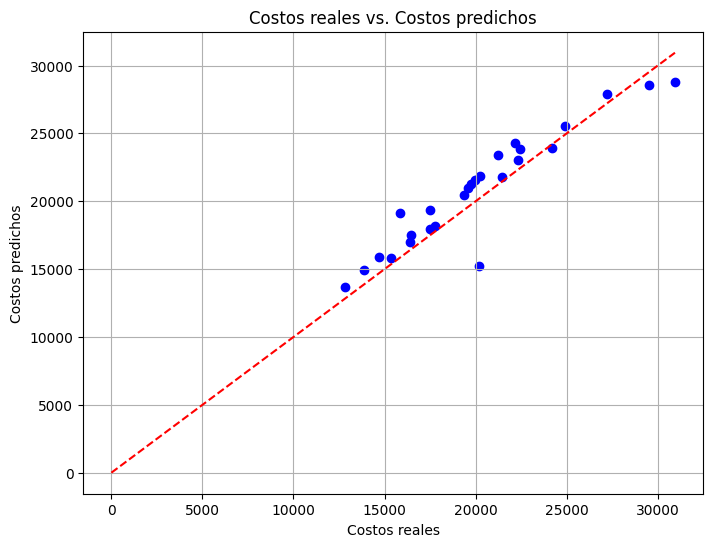

In [28]:
r2_15_train_lr, r2_15_test_lr = linear_regression(df_15)

El modelo se ajusta muy bien a los datos de prueba, pero en los datos de entrenamiento hay un mal desempeño, por lo que este modelo presenta subajuste. Esto quizás se deba a que hay muy pocos datos para entrenar el modelo.

### **Regresión Lineal para no fumadores o BMI entre 30 y 55**


MSE en train: 19881954.47353924
R² Score en train: 0.8678644498500184

MSE en test: 23374673.331075445
R² Score en test: 0.8507181008776477


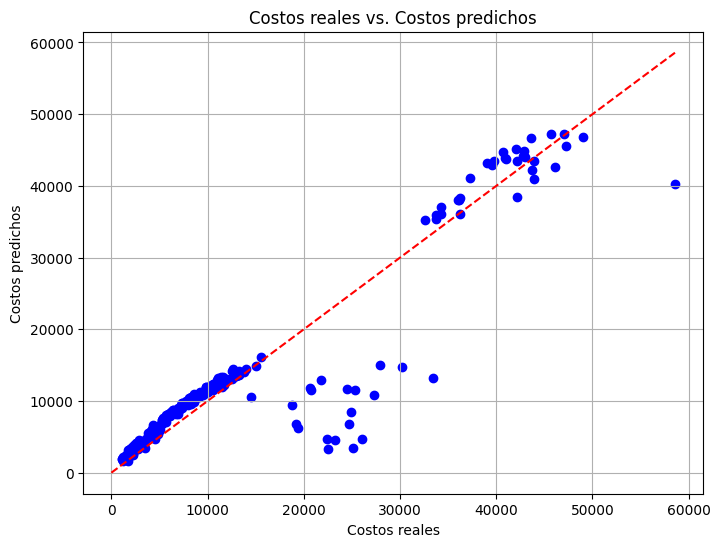

In [29]:
r2_others_train_lr, r2_others_test_lr = linear_regression(df_others)

### **Regresión Lineal con la variable category**


MSE en train: 20253583.980000626
R² Score en train: 0.8596752183674733

MSE en test: 18328864.591646146
R² Score en test: 0.8819387159204107


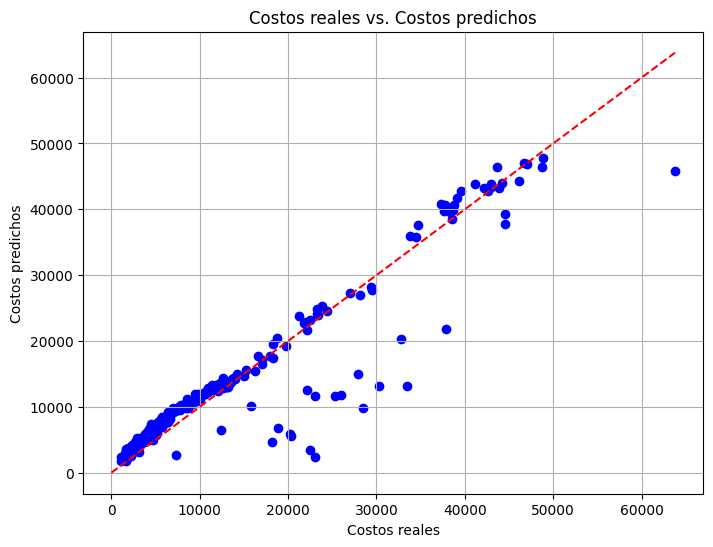

In [30]:
r2_cat_train_lr, r2_cat_test_lr = linear_regression(df_category)

El modelo mejora y no está subajustado, lo que indica que la variable category sí influye en las predicciones y mejora el desempeño del modelo.

## **Regresión Polinomial**

Ahora emplearemos regresión polinomial siguiendo la misma lógica que se usó para entrenar los modelos de regresión lineal:
- Primero se entrenará un modelo con los datos sin modificar.
- Después se crearán dos modelos separados, uno para fumadores con BMI entre 15-30 y otro para el resto de los casos (no fumadores o BMI > 30).
- Finalmente se entrerá el modelo con todos los datos, pero incluyendo la variable *category*.

In [31]:
#Función para realizar regresión polinomial (entrenar y evaluar el modelo)
def polynomial_regression(df, degree):
    X = df.drop(['charges', 'bmi_category'], axis=1) #Variables predictoras (todas excepto charges y bmi_category)
    y = df['charges'] #Variable objetivo
    
    #Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Crea el transformador para generar características polinomiales hasta el grado especificado
    poly = PolynomialFeatures(degree=degree)
    
    #Transforma las características originales en características polinomiales
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    #Crea y entrena un modelo de regresión lineal usando las características polinomiales
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    #Predicciones
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)

    #Evaluar el modelo
    r2_train = evaluate_model(y_train, y_pred_train, 'train')
    r2_test = evaluate_model(y_test, y_pred_test, 'test')
    
    #Graficar los costos reales vs. los predichos
    plot_actual_predicted(y_test, y_pred_test)
    
    return r2_train, r2_test

### **Regresión Polinomial con los datos originales**


MSE en train: 21507016.946211327
R² Score en train: 0.8509909426635679

MSE en test: 22246802.082222342
R² Score en test: 0.8567021973805874


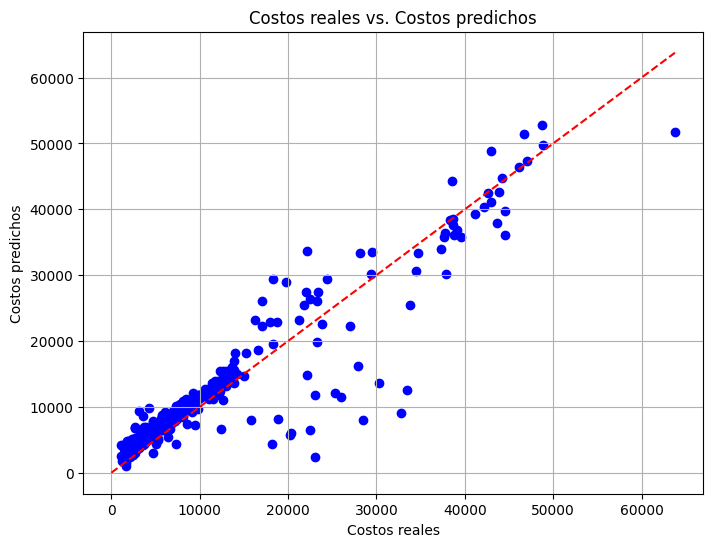

In [32]:
r2_train_poly, r2_test_poly = polynomial_regression(df, degree=3)

Al utilizar los datos originales y aplicar una regresión polinomial de grado 3, se mejora el desempeño del modelo con respecto al de regresión lineal. Esto indica que con la regresión polinomial se pueden predecir con mayor certeza los costos médicos.

### **Regresión Polinomial para fumadores con BMI entre 15 y 30**


MSE en train: 12733003.344468482
R² Score en train: 0.5120479818772052

MSE en test: 4702464.995570363
R² Score en test: 0.7664894304521942


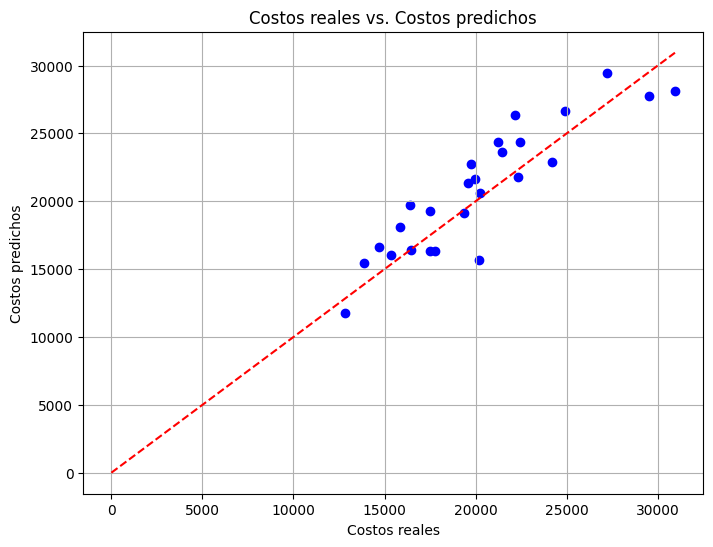

In [33]:
r2_15_train_poly, r2_15_test_poly = polynomial_regression(df_15, degree=2)

Este modelo también presenta subajuste y tiene un peor desempeño que el modelo de regresión lineal para este grupo. Estos resultados indican que para el grupo de fumadores con BMI entre 15 y 30, ni la regresión lineal ni polinomial de grado 2 logran predecir adecuadamente los costos médicos, confirmando que hay pocos datos para captar adecuadamente las relaciones en este grupo.

### **Regresión Polinomial para no fumadores o BMI entre 30 y 55**


MSE en train: 18933205.38692856
R² Score en train: 0.8741698401314639

MSE en test: 22031265.461527847
R² Score en test: 0.8592977492526845


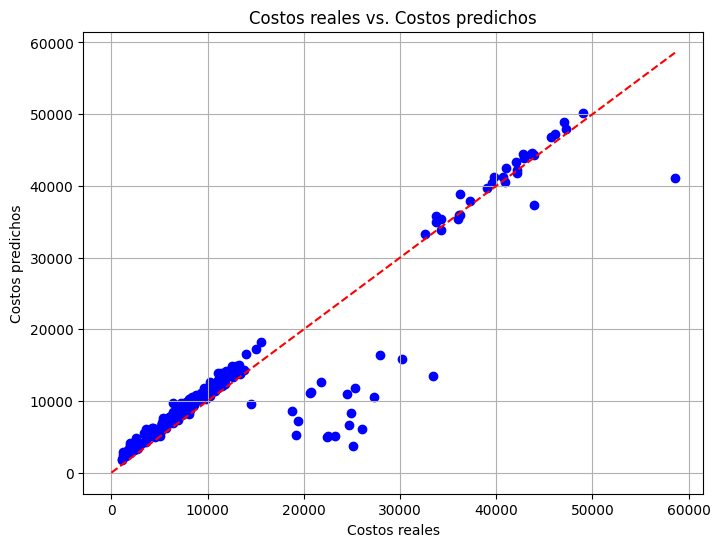

In [34]:
r2_others_train_poly, r2_others_test_poly = polynomial_regression(df_others, degree=2)

Los resultados muestran que este modelo tiene un rendimiento muy similar al modelo de regresión lineal para este grupo, lo que muestra que la relación es predominantemente lineal.

### **Regresión Polinomial con la variable category**


MSE en train: 18163285.12650001
R² Score en train: 0.8741576295028968

MSE en test: 18854140.287871238
R² Score en test: 0.8785552699419621


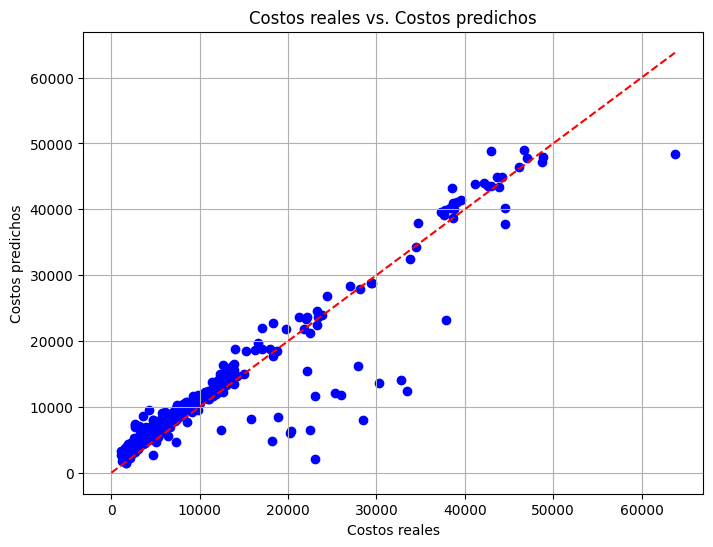

In [35]:
r2_cat_train_poly, r2_cat_test_poly = polynomial_regression(df_category, degree=3)

El desempeño nuevamente es muy similar al de regresión lineal, pero se confirma que el desempeño del modelo sí mejora al agregar la variable category.

## **Resultados y conclusión**

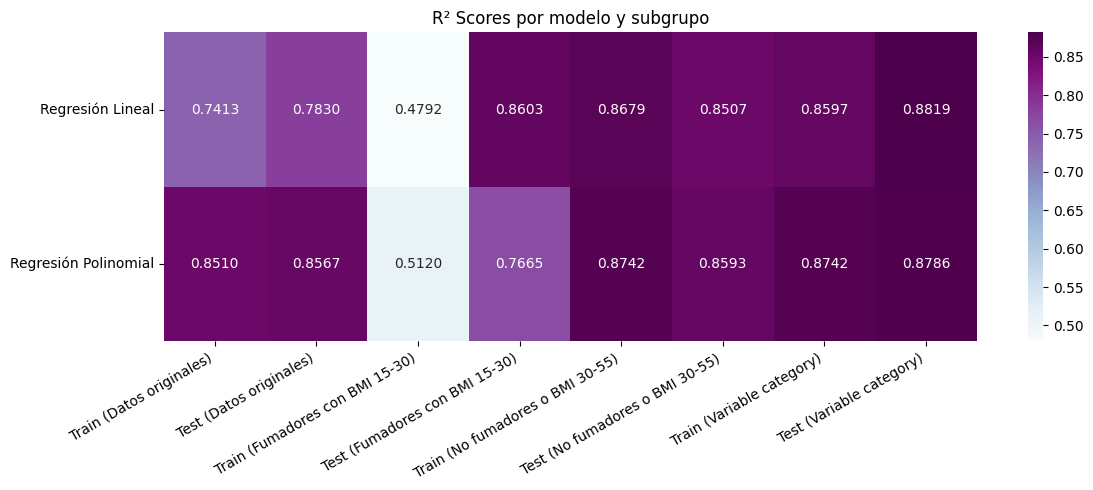

In [36]:
#Mapa de calor comparativo de los R² scores entre modelos lineales y polinomiales para los diferentes subgrupos analizados
data_r2 = {
    'Train (Datos originales)': [r2_train_lr, r2_train_poly],
    'Test (Datos originales)': [r2_test_lr, r2_test_poly],
    'Train (Fumadores con BMI 15-30)': [r2_15_train_lr, r2_15_train_poly],
    'Test (Fumadores con BMI 15-30)': [r2_15_test_lr, r2_15_test_poly],
    'Train (No fumadores o BMI 30-55)': [r2_others_train_lr, r2_others_train_poly],
    'Test (No fumadores o BMI 30-55)': [r2_others_test_lr, r2_others_test_poly],
    'Train (Variable category)': [r2_cat_train_lr, r2_cat_train_poly],
    'Test (Variable category)': [r2_cat_test_lr, r2_cat_test_poly]
}

index = ['Regresión Lineal', 'Regresión Polinomial']

df_r2 = pd.DataFrame(data_r2, index=index)

plt.figure(figsize=(12, 5))
sns.heatmap(df_r2, annot=True, cmap='BuPu', fmt='.4f')
plt.title('R² Scores por modelo y subgrupo')
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Los resultados obtenidos muestran lo siguiente:

- Al utilizar los datos originales, la regresión polinomial de grado 3 fue la que tuvo mejores resultados (R² 0.85 tanto en entrenamiento como en prueba), lo que indica que hay patrrones no lineales en los datos.
- Agregar la variable *category* que clasifica los datos en dos grupos (fumadores con BMI entre 15-30; no fumadores o personas con BMI > 30), mejoró el desempeño del modelo tanto con la regresión lineal como con la polinomial; sin embargo, se obtuvo un mejor rendmiento al emplear la regresión polinomial de grado 3.
- Dado que hay muy pocos datos para el grupo de fumadores con BMI entre 15 y 30, no se obtuvieron buenos resultados al entrenar los modelos con estos datos. 
- Para el grupo de no fumadores o personas con BMI > 30, la regresión lineal fue suficiente, ya que esta tiene un rendimiento muy similar al de la regresión polinomial.

En conclusión, la estrategia más efectiva fue incorporar una variable categórica con la semgmentación de los datos. Esto permitió al modelo aprender de manera conjunta las diferencias entre los grupos, logrando un mejor equilibrio entre precisión y generalización.